In [90]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [92]:
import matplotlib.pyplot as plt #used in plotting prediction and y_test slop.
import seaborn as sns # used in plotting prediction and y_test difference histogram

In [66]:
boston = load_boston()

In [67]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [68]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [69]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [70]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [87]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Selecting Model & Splitting Data

In [72]:
X = boston['data']

In [73]:
y = boston['target']

In [74]:
#train test split
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lm.intercept_

35.188720584626

In [80]:
lm.coef_

array([-1.22470600e-01,  4.22936773e-02,  8.31731534e-02,  2.72288201e+00,
       -1.83881525e+01,  3.93864650e+00, -8.35001030e-03, -1.34159207e+00,
        3.33045054e-01, -1.52883885e-02, -9.52995151e-01,  9.60293721e-03,
       -4.47885914e-01])

In [82]:
cdf = pd.DataFrame(lm.coef_,boston['feature_names'],columns=['Coeff'])

In [85]:
cdf

,Coeff
CRIM,-0.122471
ZN,0.042294
INDUS,0.083173
CHAS,2.722882
NOX,-18.388152
RM,3.938647
AGE,-0.008350
DIS,-1.341592
RAD,0.333045
TAX,-0.015288


# Prediction

In [88]:
predictions = lm.predict(X_test)

In [89]:
predictions

array([15.64024136, 42.22215966, 20.88546553, 29.41249609, 20.79208789,
       39.14408741, 29.80033124, 22.15024256, 11.44112524, 26.44366826,
       29.98432028, 15.23928605, 18.94955916, 15.02924706, 30.31156818,
        9.33744106, 31.56753001, 13.26883233, 37.37431868, 35.44818789,
       11.87992056, 35.32354214, 16.63000906, 21.32057918,  4.13973401,
       18.43093337, 29.88384639, 14.17814669, 36.38384977,  6.81982232,
       24.1003696 , 18.99835632, 27.86931936, 22.02651266, 11.50778386,
       19.30605745, -4.0669301 , 41.26909754, 36.59441563, 40.19207023,
       18.92310916, 23.87072737, 29.10395883, 25.25381204, 24.83749294,
       30.85085749, 27.71202163, 17.23163942, 19.31330388, 28.44185112,
       39.95458925, 26.96977542, 18.01781763, 14.22611878, 13.0649772 ,
       14.26425346, 13.94267979, 31.65324394, 15.99029026, 22.9833076 ,
       24.88228804, 21.92521813, 23.43663179, 32.31935413, 21.42058038,
       21.21093135, 38.42769557, 15.63730928, 23.21091735,  7.58

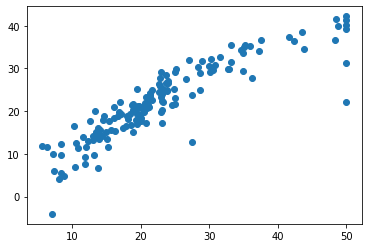

In [93]:
plt.scatter(y_test,predictions)

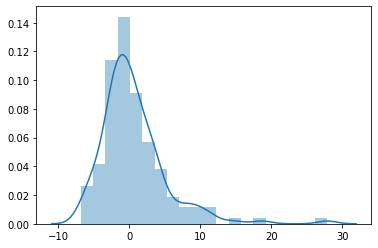

In [96]:
sns.distplot(y_test-predictions)

# Evaluation Metrics

In [99]:
from sklearn import metrics

In [100]:
metrics.mean_absolute_error(y_test,predictions)

3.148941153579209

In [101]:
metrics.mean_squared_error(y_test,predictions)

22.312282669533175

In [102]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

4.723587902170677